<a href="https://colab.research.google.com/github/slayerzeroa/Life_Insurance_Securitization/blob/main/life_insurance_securitization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#보증료 기대수입의 현재가치

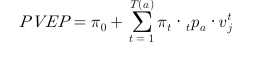

In [ ]:
# 보증료 기대수입의 현재가치
def PVEP(a_liv_t: int, monthly_surety: np.array, living_prob: np.array, v: float):
  sigma = 0
  for t in range(1, a_liv_t):
    sigma += monthly_surety[t] * living_prob[t] * (v**t)
  
  return monthly_surety[0] + sigma

In [ ]:
monthly_surety = np.array([1,2,3,4])
living_prob = np.array([0.1,0.2,0.3,0.4])
a_liv_t = 3
v = 0.3

In [ ]:
print(PVEP(3, monthly_surety, living_prob,1))

2.3


# 기대손실의 현재가치
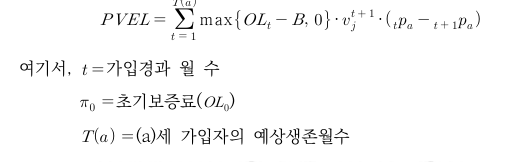
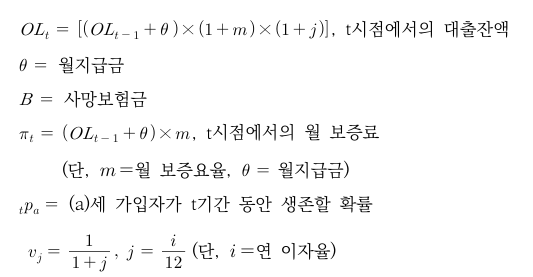



In [ ]:
# 기대손실의 현재가치

def PVEL(a_liv_t: int, OL: np.array, B: int, living_prob: np.array, v: float):
  sigma = 0
  for t in range(1, a_liv_t):
    sigma += max(OL[t]-B, 0) * (v**(t+1)) * (living_prob[t] - living_prob[t+1])
  return sigma

In [ ]:
a_liv_t = 3
OL = np.array([10,8,6,4])
B = 0.4
living_prob = np.array([0.3,0.2,0.1,0.1,0.0])
v = 0.6

In [ ]:
PVEL(a_liv_t,OL,B,living_prob,v)

0.2736

# PVEP, PVEL Generalize


In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = files.upload()

Saving life_table.xlsx to life_table.xlsx


In [3]:
life_table = pd.read_excel("life_table.xlsx")

In [5]:
print(life_table)

        연령별  기대여명(전체) (년)  기대여명(남자) (년)  기대여명(여자) (년)  사망확률(전체)  사망확률(남자)  \
0        0세          83.6          80.6          86.6   0.00238   0.00258   
1        1세          82.8          79.8          85.8   0.00014   0.00016   
2        2세          81.8          78.8          84.8   0.00012   0.00014   
3        3세          80.8          77.8          83.8   0.00010   0.00012   
4        4세          79.8          76.9          82.8   0.00008   0.00010   
..      ...           ...           ...           ...       ...       ...   
96      96세           3.2           2.7           3.3   0.22756   0.26973   
97      97세           2.9           2.5           3.1   0.24726   0.29092   
98      98세           2.7           2.4           2.8   0.26770   0.31281   
99      99세           2.6           2.2           2.6   0.28879   0.33532   
100  100세이상           2.4           2.1           2.5   1.00000   1.00000   

     사망확률(여자)  생존자(전체)  생존자(남자)  생존자(여자)  정지인구(전체)  정지인구(남자)  정지인구(여자)  \
0

In [6]:
prob_death = (life_table['사망확률(전체)'])

In [7]:
def PVEP(Pi: np.array, T: int, Pr: np.array, r: float, random_seed=7):
  np.random.seed(random_seed)  # 랜덤으로 seed 뿌리고
  PVEP_sheet = np.zeros(shape=[T+1])
  PVEP_sheet[0] = Pi[0]
  
  for i in range(1, T+1):
    PVEP_sheet[i] = PVEP_sheet[i-1] + (Pi[i]*Pr[i]*((1/(1+(r/12)))**i))

  return PVEP_sheet

In [8]:
def PVEL(T: int, OL_sheet: np.array, B: int, extended_ed_pr: np.array, r: float, random_seed=7):
  np.random.seed(random_seed)  # 랜덤으로 seed 뿌리고
  PVEL_sheet = np.zeros(shape=[T+1])
  
  for t in range(1, T+1):
    PVEL_sheet[t] = PVEL_sheet[t-1] + (max((OL_sheet[t] - B), 0) * ((1/(1+r/12))**(t+1)) * (extended_ed_pr[t]))
  return PVEL_sheet

In [9]:
def OL_sim(OL_0: int, T: int, Theta: int, m: int, r: int):
  OL_sheet = np.zeros(shape=[T+1])
  OL_sheet[0] = OL_0
  for i in range(1, T+1):
    OL_sheet[i] = (OL_sheet[i-1] + Theta) * (1 + m) * (1 + r/12)

  return OL_sheet

In [10]:
# 수정 필요 Pi_0 ?
def Pi_sim(OL_sheet: np.array, Theta: int, m: float):
  return (OL_sheet + Theta) * m

In [11]:
# 단순 linspace
def linspace_extend(Pr: np.array):
  extended_list = np.array([])
  for idx, prob in enumerate(Pr):
    if idx == len(Pr)-1:
      break
    extended_list = np.append(extended_list, np.linspace(prob, Pr[idx+1], 12), axis=0)
  return extended_list

In [12]:
# # linspace 간격 구하기
# def ed_pr(extended_pr):
#   extended_ed_pr = []
#   for idx, prob in enumerate(extended_pr):
#     if idx == len(extended_pr)-1:
#       break
#     if extended_pr[idx+1] == prob:
#       extended_ed_pr.append(prob/12)
#     else:
#       extended_ed_pr.append(extended_pr[idx+1] - prob)
#   del extended_ed_pr[0]
#   extended_ed_pr.append(1)
#   extended_ed_pr = np.array(extended_ed_pr)
#   return extended_ed_pr

In [13]:
# linspace 간격 구하기
def ed_pr(extended_pr):
  extended_ed_pr = []
  for idx, prob in enumerate(extended_pr):
    if idx == len(extended_pr)-1:
      break
    extended_ed_pr.append(extended_pr[idx+1] - prob)
  del extended_ed_pr[0]
  extended_ed_pr.append(1)
  extended_ed_pr = np.array(extended_ed_pr)
  return extended_ed_pr

In [19]:
OL_0 = 10000
T = 300
Pr = np.array(prob_death)
r = 0.02
Theta = 250
m= 0.002
B = 100000
# Pi_0 = OL_0 * 0.02

In [20]:
extended_pr = linspace_extend(Pr)
extended_ed_pr = ed_pr(extended_pr)

In [21]:
OL_sheet = OL_sim(OL_0, T, Theta, m, r)
Pi_sheet = Pi_sim(OL_sheet, Theta, m)

In [22]:
#print(OL_sheet)
#print(Pi_sheet)

In [23]:
ex_pr = extended_pr[-601:-300]
#len(ex_pr)

In [24]:
PVEP_sheet = PVEP(Pi_sheet, T, ex_pr, r)
#print(PVEP_sheet)

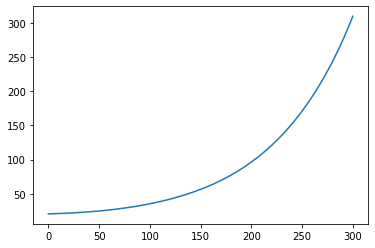

In [25]:
plt.plot(range(301), PVEP_sheet)
plt.show()

In [26]:
ex_ed_pr = extended_ed_pr[-601:-300]

In [27]:
PVEL_sheet = PVEL(T, OL_sheet, B, ex_ed_pr, r)

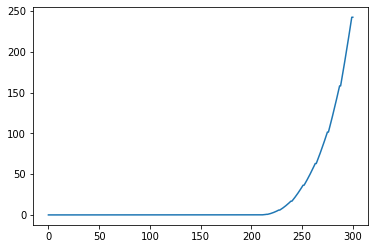

In [28]:
plt.plot(range(301), PVEL_sheet)
plt.show()

#Calculate θ using iteration

In [121]:
def cal_theta(Pi_0):
  Theta = 0
  while True:
    OL_sheet = OL_sim(OL_0, T, Theta, m, r)
    Pi_sheet = Pi_sim(OL_sheet, Theta, m)
    Pi_sheet[0] = Pi_0
    
    PVEP_sheet = PVEP(Pi_sheet, T, ex_pr, r)
    PVEL_sheet = PVEL(T, OL_sheet, B, ex_ed_pr, r)
    if abs(PVEP_sheet[-1] - PVEL_sheet[-1]) < 1:
      return(Theta)
      break
    if PVEP_sheet[-1] - PVEL_sheet[-1] < -1000:
      print("error occurs!")
      break  
    else:
      print(PVEP_sheet[-1] - PVEL_sheet[-1])
      Theta += 0.001

In [122]:
# 사망확률 관련
Pr = np.array(prob_death)
extended_pr = linspace_extend(Pr)
extended_ed_pr = ed_pr(extended_pr)
ex_pr = extended_pr[-301:]
ex_ed_pr = extended_ed_pr[-301:]

In [123]:
print(ex_ed_pr)

[0.00000000e+00 2.60909091e-04 2.60909091e-04 2.60909091e-04
 2.60909091e-04 2.60909091e-04 2.60909091e-04 2.60909091e-04
 2.60909091e-04 2.60909091e-04 2.60909091e-04 2.60909091e-04
 0.00000000e+00 3.08181818e-04 3.08181818e-04 3.08181818e-04
 3.08181818e-04 3.08181818e-04 3.08181818e-04 3.08181818e-04
 3.08181818e-04 3.08181818e-04 3.08181818e-04 3.08181818e-04
 0.00000000e+00 3.61818182e-04 3.61818182e-04 3.61818182e-04
 3.61818182e-04 3.61818182e-04 3.61818182e-04 3.61818182e-04
 3.61818182e-04 3.61818182e-04 3.61818182e-04 3.61818182e-04
 0.00000000e+00 4.12727273e-04 4.12727273e-04 4.12727273e-04
 4.12727273e-04 4.12727273e-04 4.12727273e-04 4.12727273e-04
 4.12727273e-04 4.12727273e-04 4.12727273e-04 4.12727273e-04
 0.00000000e+00 4.54545455e-04 4.54545455e-04 4.54545455e-04
 4.54545455e-04 4.54545455e-04 4.54545455e-04 4.54545455e-04
 4.54545455e-04 4.54545455e-04 4.54545455e-04 4.54545455e-04
 0.00000000e+00 5.10000000e-04 5.10000000e-04 5.10000000e-04
 5.10000000e-04 5.100000

In [285]:
# 변수 관련
OL_0 = 100
T = 300
r = 0.033
m = 0.0001
B = 800

Pi_0 = OL_0 * 0.04

prob = ex_ed_pr
Iteration = 4000


# OL_0 = 100
# T = 300
# r = 0.033
# m = 0.0001
# B = 1100

# Pi_0 = OL_0 * 0.04

# prob = ex_ed_pr
# Iteration = 1000

In [286]:
theta = cal_theta(Pi_0)

4.413806450037211
4.414466559269977
4.415126668502723
4.41578677773548
4.416446886968236
4.417106996200989
4.417767105433733
4.4184272146665
4.419087323899256
4.419747433132002
4.420407542364756
4.42106765159751
4.421727760830263
4.42238787006303
4.4230479792957755
4.423708088528522
4.424368197761281
4.425028306994037
4.425688416226792
4.426348525459546
4.4270086346923065
4.427668743925046
4.428328853157809
4.428988962390557
4.429649071623318
4.430309180856077
4.430969290088824
4.431629399321573
4.43228950855432
4.432949617787082
4.433609727019836
4.434269836252596
4.434929945485347
4.435590054718107
4.436250163950857
4.436910273183605
4.437570382416361
4.438230491649116
4.438890600881882
4.43955071011463
4.440210819347383
4.440870928580134
4.4415310378128945
4.442191147045648
4.442851256278398
4.44351136551115
4.444171474743905
4.444831583976656
4.445491693209417
4.4461518024421665
4.446811911674925
4.447472020907672
4.448132130140427
4.4487922393731765
4.449452348605933
4.45011245783

In [287]:
print(theta)

1.2109999999999774


#theta 기반 시뮬레이션

In [288]:
flag_list = [0, 1]
def simulate_cf(prob, T, Iteration, theta, random_seed=7):
    sheet = np.zeros(shape=[Iteration, T + 1])
    cal_cf = []
    for i in range(Iteration):
        for j in range(1, T + 1):
            p = prob[j]
            flag = np.random.choice(flag_list, p=[1-p, p])
            if flag == 1:
               sheet[i, j] = sheet[i, j - 1] + B * (1/(1+r/12)**j)
               cal_cf.append(sheet[i, j])
               break
            else:
              sheet[i, j] = sheet[i, j - 1] - theta * (1/(1+r/12)**j)
    return sheet, cal_cf

In [289]:
sheet, cal_cf = simulate_cf(prob, T, Iteration, theta)

In [290]:
simulations_df = pd.DataFrame(np.transpose(sheet))

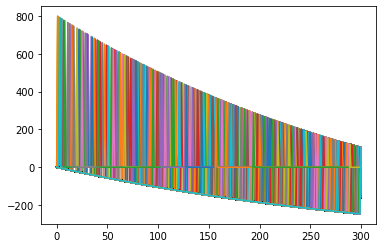

In [291]:
plt.plot(simulations_df)
plt.show()

In [292]:
print(simulations_df)

         0           1         2         3           4         5     \
0    0.000000    0.000000  0.000000  0.000000    0.000000  0.000000   
1   -1.207679   -1.207679 -1.207679 -1.207679   -1.207679 -1.207679   
2   -2.412046   -2.412046 -2.412046 -2.412046   -2.412046 -2.412046   
3   -3.613110   -3.613110 -3.613110 -3.613110   -3.613110 -3.613110   
4   -4.810880   -4.810880 -4.810880 -4.810880   -4.810880 -4.810880   
..        ...         ...       ...       ...         ...       ...   
296  0.000000 -245.028246  0.000000  0.000000 -245.028246  0.000000   
297  0.000000 -245.563945  0.000000  0.000000 -245.563945  0.000000   
298  0.000000 -246.098175  0.000000  0.000000 -246.098175  0.000000   
299  0.000000 -246.630940  0.000000  0.000000 -246.630940  0.000000   
300  0.000000  104.354250  0.000000  0.000000  104.354250  0.000000   

           6         7           8         9     ...      3990      3991  \
0      0.000000  0.000000    0.000000  0.000000  ...  0.000000  0.00000

In [293]:
cashflow = np.mean(cal_cf)
print(f"해당 상품의 현재가치는 {round(cashflow)}입니다.")

해당 상품의 현재가치는 163입니다.


#Calculate θ using sympy (수정 필요)

In [ ]:
from sympy import *
from sympy.abc import theta, k, x, t, p
from sympy.core.numbers import Integer as SympyInteger

sympy 테스트

In [ ]:
Sum(k*x-2, (k, 1, 3))

Sum(k*x - 2, (k, 1, 3))

In [ ]:
nsolve(Eq(Sum(k*x-2, (k, 1, 3))), 0)

/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:492: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


1.00000000000000

In [ ]:
Eq(Sum(k*x-2, (k, 1, 3)))

Eq(Sum(k*x - 2, (k, 1, 3)), 0)

calculate PVEP

In [ ]:
eq = 350 - 18500 + Sum(182.94 * (1/(1+x)**(k/12)), (k, 1, 120))

In [ ]:
PVEP_eq = Pi_sheet[0] + Sum((OL_sheet[t-1]+theta)*m*ex_pr[t]*(1/(1+r/12)**t), (t, 1, T))

IndexError: ignored

In [ ]:
sy_OL = Array(OL_sheet)
sy_Pi = Array(Pi_sheet)
sy_ex_pr = Array(ex_pr)
sy_ed_pr = Array(ex_ed_pr)
sy_T = Integer(T)
sy_r = Integer(r)
sy_m = Integer(m)

In [ ]:
from sympy import Max

f = lambdify((k, p), Max(k, p))

In [ ]:
Max(sy_OL[1]+theta, 2)

In [ ]:
nsolve(sy_Pi[0]+Sum((sy_OL[t-1]+x)* m * sy_ex_pr[t] * (1/(1+r/12)**t) - f(sy_OL[t-1]+x, 0), (t, 1, T)), 0)

In [ ]:
print(type(t))